In [1]:
import gpasdlm  

In [2]:
def func(a: int = 1 , b: int = 2) -> int:
    return "The sum of {} and {} is {}".format(a,b,a+b)

In [3]:
func.__annotations__

{'a': int, 'b': int, 'return': int}

In [4]:
func(3,6)

'The sum of 3 and 6 is 9'

In [5]:
from gpasdlm.gp import GaussianProcessRegressor as GPR
from gpasdlm.kernels import *

In [6]:
gpasdlm.invtools.inv_col_add_update.__annotations__

{'A': 'numpy array', 'x': 'numpy vector', 'r': float, 'return': 'numpy array'}

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
m = 1500
x = np.linspace(0,8,m)
kernel = RBF() + Periodic()
y = kernel.simulate(x,seed=np.random.seed(2))
#y = np.sin(3*x)*np.sin(x)
y_noisy = y + .1*np.random.randn(x.size)
#y_noisy = 100000 + y_noisy*10000
train_size = int(.7*x.size)

(xtrain, ytrain) = x[:train_size],y_noisy[:train_size]
(xtest, ytest) = x[train_size:],y_noisy[train_size:]

In [8]:
(RBF() + Polynomial()).lable()

'RBF + Polynomial'

In [11]:
plt.figure(figsize=(10,5),fontsize=12)

TypeError: __init__() got an unexpected keyword argument 'fontsize'

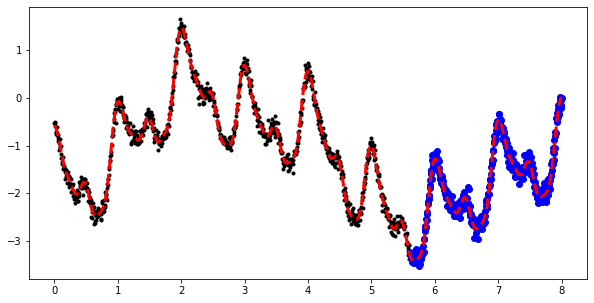

In [10]:
plt.figure(figsize=(10,5))
plt.plot(xtrain,ytrain,'k.')
plt.plot(xtest, ytest,'bo')
plt.plot(x,y,'r--',lw=3)
plt.show()

In [11]:
gpr = GPR(xtrain,ytrain)
#gpr.kernel_choice = ""
gpr.fit()


In [12]:
#xs = np.linspace(0,7,1000)
yp,_ = gpr.predict(x)

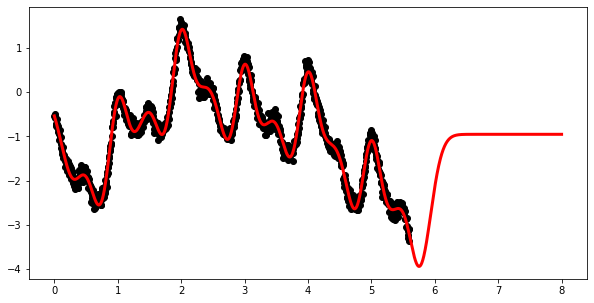

In [13]:
plt.figure(figsize=(10,5))
plt.plot(xtrain,ytrain,'ok')
#plt.plot(x,y,'b',lw=3)
plt.plot(x,yp,'r',lw=3)

plt.show()

In [ ]:
kernelExpression = " Matern52  + Periodic*RBF   + RBF * Matern32*Linear + Periodic"
list_kernel = kernelExpression.replace(" ", "").split("+")
#print(list_kernel)
list_kernel = [x.replace(" ", "").split("*") if '*' in x else x for x in list_kernel]
list_kernel

import importlib
module_ = importlib.import_module("gpasdlm.kernels")

kernels = []
for ker_name in list_kernel:
    if isinstance(ker_name,list):
        prod_kernel_list = []
        for k in ker_name:
            class_ = getattr(module_, k)
            instance = class_()
            prod_kernel_list.append(instance)
        prod_kernel = np.prod(prod_kernel_list)
        #print(prod_kernel.label())
        kernels.append(prod_kernel)
            
    else:
        class_ = getattr(module_, ker_name)
        instance = class_()
        #print(instance.__class__.__name__)

        kernels.append(instance)
ker = sum(kernels)
print(ker)
ker

In [ ]:
yker = ker.simulate(x)
plt.plot(x,yker)

In [ ]:
K = RBF()*RBF() + Periodic()
K.__class__.__name__

In [ ]:
y = RBF(length_scale=.5).simulate2d(x)
fig = plt.figure(figsize=(10,5) )
plt.imshow(y,cmap='jet')
plt.show()

In [ ]:
Y = RBF().simulate3d(x,time = np.linspace(0,3,50),time_kernel=Periodic(length_scale=1) + RBF())
#Y = Y + .5*np.random.randn(*Y.shape)# noise
print(Y.shape)

In [ ]:

import time
from IPython.display import clear_output

for i in range(Y.shape[2]):
    clear_output(wait=True)
    fig = plt.figure(figsize=(8,5) )
    plt.imshow(Y[:,:,i],cmap ="jet",vmin=Y.min(),vmax=Y.max())
    plt.title("Gaussian Process 3d simulation (spatiotemporal)")
    plt.colorbar()
    plt.clim(vmin=-3,vmax=3)

    plt.show() 
    time.sleep(0.01)